# T4 Árboles, bosques, bagging y boosting

## Problemas

1. CART entropía
2. CART Gini
3. CART Gini 3d
4. CART MSE

# Cuestiones

1. CART
2. Gradient boosting
3. Comparación


<p style="page-break-after:always;"></p>


**CART entropía:** $\;$ Sea un problema de clasificación de datos 2d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $4$ datos de la clase $1$, $\{(1,1)^t,$ $(1,2)^t,$ $(3,1)^t,$ $(3,2)^t\}$, y $2$ de la clase $2$, $\{(2,1)^t,$ $(2,2)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea la entropía para medir la impureza.

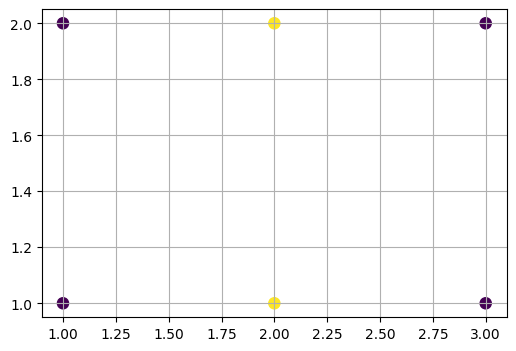

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[1, 1], [1, 2], [3, 1], [3, 2], [2, 1], [2, 2]]); y =  np.array([1, 1, 1, 1, 2, 2])
plt.figure(figsize=(6, 4)); plt.grid(); plt.scatter(*X.T, c=y, s=64);


<p style="page-break-after:always;"></p>


**CART entropía:** $\;$ Sea un problema de clasificación de datos 2d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $4$ datos de la clase $1$, $\{(1,1)^t,$ $(1,2)^t,$ $(3,1)^t,$ $(3,2)^t\}$, y $2$ de la clase $2$, $\{(2,1)^t,$ $(2,2)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea la entropía para medir la impureza.

**Solución:**

$$H_i=-\hat{\pi}_{i1}\log_2\hat{\pi}_{i1}-\hat{\pi}_{i2}\log_2\hat{\pi}_{i2}%
=-\frac{4}{6}\log_2\frac{4}{6}-\frac{2}{6}\log_2\frac{2}{6}=0.9183$$

* $j_i=1, t_i=1.5$
$$\begin{align*}
H(\mathcal{D}_i^L(1, 1.5))&=-1\log_2 1-0\log_2 0=0\\
H(\mathcal{D}_i^R(1, 1.5))&=-\frac{1}{2}\log_2 \frac{1}{2}-\frac{1}{2}\log_2 \frac{1}{2}=1\\
\Delta(1, 1.5)&=0.9183-\frac{2}{6}\cdot 0-\frac{4}{6}\cdot 1=0.2516
\end{align*}$$

* $j_i=1, t_i=2.5\qquad \Delta(1, 2.5)=0.2516$

* $j_i=2, t_i=1.5$
$$\begin{align*}
H(\mathcal{D}_i^L(2, 1.5))&=-\frac{2}{3}\log_2 \frac{2}{3}-\frac{1}{3}\log_2 \frac{1}{3}=0.9183\\
H(\mathcal{D}_i^R(2, 1.5))&=0.9183\\
\Delta(2, 1.5)&=0.9183-\frac{3}{6}\cdot 0.9183-\frac{3}{6}\cdot 0.9183=0
\end{align*}$$

* Óptimo: $\;$ cualquiera de los dos primeros


<p style="page-break-after:always;"></p>


**CART entropía:** $\;$ Sea un problema de clasificación de datos 2d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $4$ datos de la clase $1$, $\{(1,1)^t,$ $(1,2)^t,$ $(3,1)^t,$ $(3,2)^t\}$, y $2$ de la clase $2$, $\{(2,1)^t,$ $(2,2)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea la entropía para medir la impureza.

**Solución a máquina:**

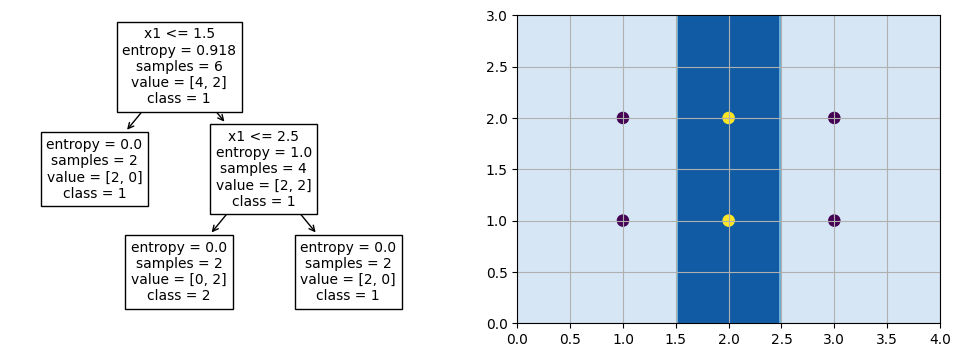

In [2]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[1, 1], [1, 2], [3, 1], [3, 2], [2, 1], [2, 2]]); y =  np.array([1, 1, 1, 1, 2, 2])
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_tree(dt, feature_names=list(('x1', 'x2')), class_names=list(('1', '2')), ax=axes[0], fontsize=10);
xx, yy = np.meshgrid(np.linspace(0, 4, num=100), np.linspace(0, 3, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape); axes[1].grid()
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=64);


<p style="page-break-after:always;"></p>


**CART Gini:** $\;$ Sea un problema de clasificación de datos 2d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $4$ datos de la clase $1$, $\{(1,1)^t,$ $(1,2)^t,$ $(3,1)^t,$ $(3,2)^t\}$, y $2$ de la clase $2$, $\{(2,1)^t,$ $(2,2)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el índice Gini (error de clasificación esperado) para medir la impureza.

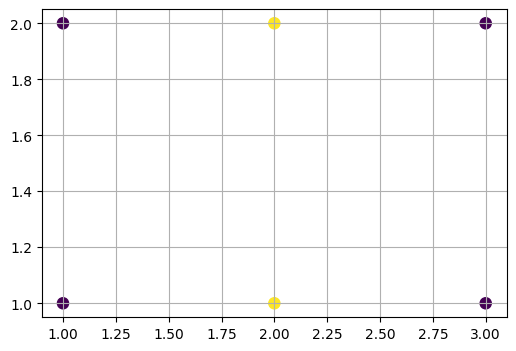

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[1, 1], [1, 2], [3, 1], [3, 2], [2, 1], [2, 2]]); y =  np.array([1, 1, 1, 1, 2, 2])
plt.figure(figsize=(6, 4)); plt.grid(); plt.scatter(*X.T, c=y, s=64);


<p style="page-break-after:always;"></p>


**CART Gini:** $\;$ Sea un problema de clasificación de datos 2d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $4$ datos de la clase $1$, $\{(1,1)^t,$ $(1,2)^t,$ $(3,1)^t,$ $(3,2)^t\}$, y $2$ de la clase $2$, $\{(2,1)^t,$ $(2,2)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el índice Gini (error de clasificación esperado) para medir la impureza.

**Solución:**

$$G_i=1-\hat{\pi}_{i1}^2-\hat{\pi}_{i2}^2=1-(4/6)^2-(2/6)^2=1-20/36=16/36=4/9=0.44$$

En el eje horizontal (dimensión $d=1$) tenemos dos posibles splits que dejan dos datos de la clase $1$ a un lado y el resto al otro lado, por lo que producen la misma reducción de impureza. Tomemos, por ejemplo, el split basado en el umbral $t=1.5$. En este caso, dos datos de la clase $1$ van al hijo izquierdo y el resto al derecho. Las impurezas de los hijos y reducción de impureza respecto al padre son:
\begin{align*}
G(\mathcal{D}_i^L(1,1.5))&=1-(2/2)^2-(0/2)^2=0\\%
G(\mathcal{D}_i^R(1,1.5))&=1-(2/4)^2-(2/4)^2=1/2\\%
\Delta&=G_i-2/6\,G(\mathcal{D}_i^L(1,1.5))-4/6\,G(\mathcal{D}_i^R(1,1.5))\\%
  &=4/9-2/6\cdot 0-4/6\cdot 1/2%=4/9-1/3%
    =1/9=0.11
\end{align*}

En el eje vertical (dimensión $d=2$) tenemos un único split que deja ambos hijos con dos datos de la clase $1$ y uno de la $2$:
\begin{align*}
G(\mathcal{D}_i^L(1,1.5))&=1-(2/3)^2-(1/3)^2=1-5/9=4/9\\%
G(\mathcal{D}_i^R(1,1.5))&=G(\mathcal{D}_i^L(1,1.5))\\%
\Delta&=G_i-3/6\,G(\mathcal{D}_i^L(1,1.5))-3/6\,G(\mathcal{D}_i^R(1,1.5))\\%
  &=4/9-3/6\cdot 4/9-3/6\cdot 4/9=0
\end{align*}
Por tanto, un split óptimo consiste en particionar los datos con la primera variable (horizontal) y umbral $t=1.5$; también sería óptimo emplear el umbral $t=2.5$.


<p style="page-break-after:always;"></p>


**CART Gini:** $\;$ Sea un problema de clasificación de datos 2d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $4$ datos de la clase $1$, $\{(1,1)^t,$ $(1,2)^t,$ $(3,1)^t,$ $(3,2)^t\}$, y $2$ de la clase $2$, $\{(2,1)^t,$ $(2,2)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el índice Gini (error de clasificación esperado) para medir la impureza.

**Solución a máquina:**

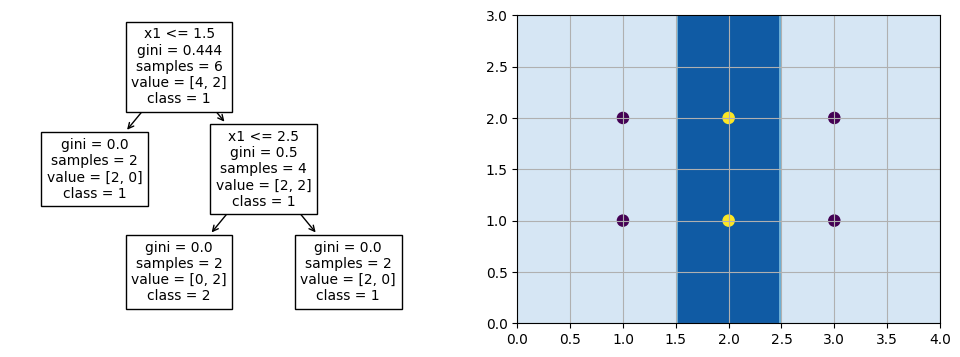

In [2]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[1, 1], [1, 2], [3, 1], [3, 2], [2, 1], [2, 2]]); y =  np.array([1, 1, 1, 1, 2, 2])
dt = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_tree(dt, feature_names=list(('x1', 'x2')), class_names=list(('1', '2')), ax=axes[0], fontsize=10);
xx, yy = np.meshgrid(np.linspace(0, 4, num=100), np.linspace(0, 3, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape); axes[1].grid()
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=64);


<p style="page-break-after:always;"></p>


**CART Gini 3d:** $\;$ Sea un problema de clasificación de datos 3d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $2$ datos de la clase $1$, $\{(1,1,2)^t,(1,2,1)^t\}$, y $2$ de la clase $2$, $\{(2,1,2)^t,(2,2,1)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el índice Gini (error de clasificación esperado) para medir la impureza.


<p style="page-break-after:always;"></p>


**CART Gini 3d:** $\;$ Sea un problema de clasificación de datos 3d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $2$ datos de la clase $1$, $\{(1,1,2)^t,(1,2,1)^t\}$, y $2$ de la clase $2$, $\{(2,1,2)^t,(2,2,1)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el índice Gini (error de clasificación esperado) para medir la impureza.

**Solución:**

El nodo $i$ tiene dos datos de la clase $1$ y otros de la $2$, por lo que resulta máximamente impuro:
$$G_i=1-\hat{\pi}_{i1}^2-\hat{\pi}_{i2}^2=1-(2/4)^2-(2/4)^2=1-1/2=1/2$$

Es fácil determinar los posibles splits del nodo $i$ si tenemos en cuenta que, en las tres dimensiones, los datos están en $1$ y $2$ únicamente. Por tanto, solo cabe un split por cada dimensión, en $1.5$ por ejemplo. El split en la dimensión $1$ deja los dos datos de la clase $1$ a un lado y los dos datos de la clase $2$ al otro; esto es, produce dos nodos hijos puros. Por el contratrio, los splits en las dimensiones $2$ y $3$ producen hijos con un dato de cada clase; esto es, máximamente impuros, como el nodo $i$. En definitiva, el split de la dimensión $1$ es óptimo y produce la máxima reducción de impureza posible:
\begin{align*}
G(\mathcal{D}_i^L(1,1.5))&=1-(2/2)^2-(0/2)^2=0\\[3mm]%
G(\mathcal{D}_i^R(1,1.5))&=1-(0/2)^2-(2/2)^2=0\\[3mm]%
\Delta&=G_i-2/4\,G(\mathcal{D}_i^L(1,1.5))-2/4\,G(\mathcal{D}_i^R(1,1.5))\\%
  &=1/2-0-0=1/2
\end{align*}


<p style="page-break-after:always;"></p>


**CART Gini 3d:** $\;$ Sea un problema de clasificación de datos 3d en $C=2$ clases, $y\in\{1,2\}$, para el que se está construyendo un árbol de clasificación. El algoritmo de aprendizaje se halla procesando un nodo $i$ cuyo conjunto de datos, $\mathcal{D}_i$, consta de $2$ datos de la clase $1$, $\{(1,1,2)^t,(1,2,1)^t\}$, y $2$ de la clase $2$, $\{(2,1,2)^t,(2,2,1)^t\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el índice Gini (error de clasificación esperado) para medir la impureza.

**Solución a máquina:**

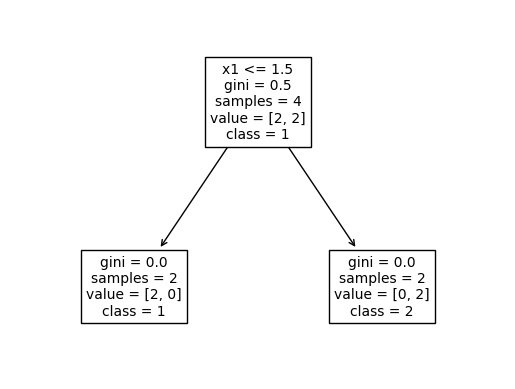

In [1]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[1, 1, 2], [1, 2, 1], [2, 1, 2], [2, 2, 1]]); y =  np.array([1, 1, 2, 2])
dt = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=23).fit(X, y)
plot_tree(dt, feature_names=list(('x1', 'x2')), class_names=list(('1', '2')), fontsize=10);


<p style="page-break-after:always;"></p>


**CART MSE:** $\;$ Sea un problema de regresión de datos 2d en $\mathbb{R}$, para el que se está construyendo un árbol de regresión. El algoritmo de aprendizaje se halla procesando un nodo $i$ de conjunto de datos $\mathcal{D}_i=\{((1, 1)^t, 1),\,$ $((2, 4)^t, 2),\,$ $((5, 1)^t, 1),\,$ $((5, 4)^t, 1)\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el error cuadrático medio (con respecto a la respuesta media del nodo) para medir la impureza.

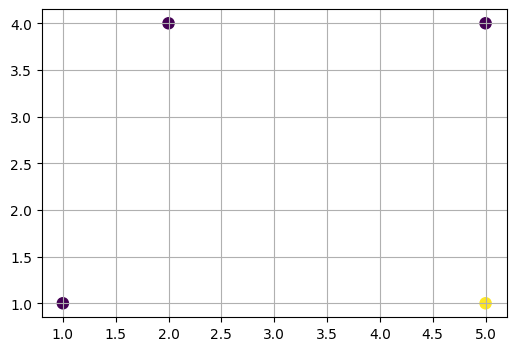

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[1, 1], [2, 4], [5, 1], [5, 4]]); y =  np.array([1, 1, 2, 1])
plt.figure(figsize=(6, 4)); plt.grid(); plt.scatter(*X.T, c=y, s=64);


<p style="page-break-after:always;"></p>


**CART MSE:** $\;$ Sea un problema de regresión de datos 2d en $\mathbb{R}$, para el que se está construyendo un árbol de regresión. El algoritmo de aprendizaje se halla procesando un nodo $i$ de conjunto de datos $\mathcal{D}_i=\{((1, 1)^t, 1),\,$ $((2, 4)^t, 2),\,$ $((5, 1)^t, 1),\,$ $((5, 4)^t, 1)\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el error cuadrático medio (con respecto a la respuesta media del nodo) para medir la impureza.

**Solución:**

$$\hat{y}=\frac{5}{4}=1.25\qquad c(\mathcal{D}_i)=\frac{1}{4}(3(1-1.25)^2+(2-1.25)^2)=3/16=0.1875$$

1. $j_i=1, t_i=3.5$

$$\begin{align*}
c(\mathcal{D}_i^L(1, 3.5))&=\frac{1}{2}((1-1.5)^2+(2-1.5)^2)=1/4\\
c(\mathcal{D}_i^R(1, 3.5))&=\frac{1}{2}(2(1-1)^2)=0\\
\Delta(1, 3.5)&=3/16-2/4\cdot 1/4-2/4\cdot 0=1/16=0.0625
\end{align*}$$

2. $j_i=1, t_i=1.5$

$$\begin{align*}
c(\mathcal{D}_i^L(1, 1.5))&=\frac{1}{1}(1-1)^2=0\\
c(\mathcal{D}_i^R(1, 1.5))&=\frac{1}{3}((2-4/3)^2+2(1-4/3)^2)=2/9\\
\Delta(1, 1.5)&=3/16-1/3\cdot 0-2/3\cdot 2/9=0.0394
\end{align*}$$

3. $j_i=2, t_i=2.5\to \Delta = 1/16$

Split óptimo: el 1 o el 3


<p style="page-break-after:always;"></p>


**CART MSE:** $\;$ Sea un problema de regresión de datos 2d en $\mathbb{R}$, para el que se está construyendo un árbol de regresión. El algoritmo de aprendizaje se halla procesando un nodo $i$ de conjunto de datos $\mathcal{D}_i=\{((1, 1)^t, 1),\,$ $((2, 4)^t, 2),\,$ $((5, 1)^t, 1),\,$ $((5, 4)^t, 1)\}$. Determina la impureza del nodo $i$, así como un split óptimo del mismo en términos de reducción de impureza. Emplea el error cuadrático medio (con respecto a la respuesta media del nodo) para medir la impureza.

**Solución a máquina:**

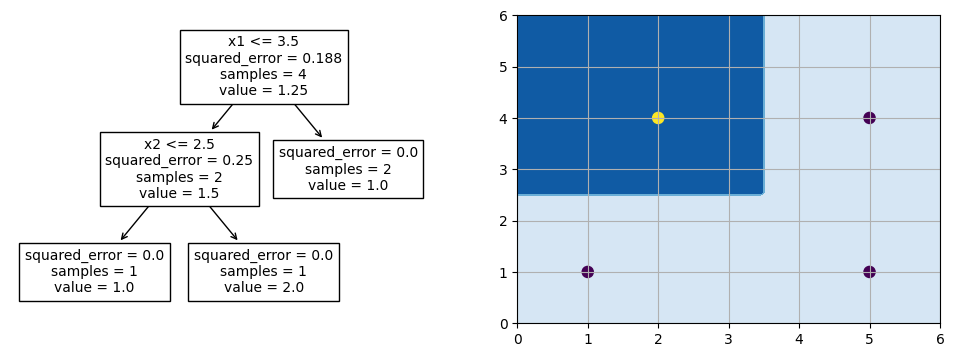

In [2]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
X = np.array([[1, 1], [2, 4], [5, 1], [5, 4]]); y =  np.array([1, 2, 1, 1])
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_tree(dt, feature_names=list(('x1', 'x2')), ax=axes[0], fontsize=10);
xx, yy = np.meshgrid(np.linspace(0, 6, num=100), np.linspace(0, 6, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape); axes[1].grid()
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=64);


<p style="page-break-after:always;"></p>


**CART:** $\;$ Los árboles presentan una serie de ventajas e incovenientes que cabe tener presentes para su uso. Indica la respuesta incorrecta (o escoge la última opción si las tres primeras son correctas).
1. Son insensibles a transformaciones monótonas de las entradas ya que los puntos de split se basan en la ordenación de los datos, por lo que es necesario estandarizarlos.
2. Son de ajuste rápido y fácil escalado a muchos datos.
3. Son inestables, esto es, pequeños cambios en los datos de entrada pueden conducir a grandes cambios en la estructura del árbol.
4. Todas son correctas.


<p style="page-break-after:always;"></p>


**CART:** $\;$ Los árboles presentan una serie de ventajas e incovenientes que cabe tener presentes para su uso. Indica la respuesta incorrecta (o escoge la última opción si las tres primeras son correctas).
1. Son insensibles a transformaciones monótonas de las entradas ya que los puntos de split se basan en la ordenación de los datos, por lo que es necesario estandarizarlos.
2. Son de ajuste rápido y fácil escalado a muchos datos.
3. Son inestables, esto es, pequeños cambios en los datos de entrada pueden conducir a grandes cambios en la estructura del árbol.
4. Todas son correctas.

**Solución:**

La 1 es incorrecta. Al revés de lo que dice, no es necesario estandarizar los datos porque los árboles son insensibles a transformaciones monótonas de las entradas.


<p style="page-break-after:always;"></p>


**Gradient boosting:** $\;$ Gradient boosting es una técnica **forward stagewise additive modeling (FSAM),** pero abandona la idea de reponderar datos iterativamente y replantea FSAM como descenso por gradiente para un problema de búsqueda en un espacio funcional, $\hat{\boldsymbol{f}}=\operatorname{argmin}_{\boldsymbol{f}}\mathcal{L}(\boldsymbol{f})$. Indica la respuesta incorrecta (o escoge la última opción si las tres primeras son correctas).
1. El paso $m$ halla $\boldsymbol{f}_m=\boldsymbol{f}_{m-1}-\beta_m\boldsymbol{g}_m$, donde $\boldsymbol{g}_m$ es el gradiente de $\mathcal{L}(\boldsymbol{f})$ en $\boldsymbol{f}=\boldsymbol{f}_{m-1}$ y $\beta_m$ se obtiene por búsqueda lineal.
2. $\boldsymbol{f}_m$ se obtiene añadiendo a $\boldsymbol{f}_{m-1}$ un modelo base $F_m(\boldsymbol{x})$ ajustado por mínimos cuadrados al residuo del gradiente.
3. $\beta_m$ suele sustituirse por un factor de reducción $0<\nu\leq 1$ que permite regularizar y, así, $f_m(\boldsymbol{x})=f_{m-1}(\boldsymbol{x})+\nu F_m(\boldsymbol{x})$.
4. Todas son correctas.


<p style="page-break-after:always;"></p>


**Gradient boosting:** $\;$ Gradient boosting es una técnica **forward stagewise additive modeling (FSAM),** pero abandona la idea de reponderar datos iterativamente y replantea FSAM como descenso por gradiente para un problema de búsqueda en un espacio funcional, $\hat{\boldsymbol{f}}=\operatorname{argmin}_{\boldsymbol{f}}\mathcal{L}(\boldsymbol{f})$. Indica la respuesta incorrecta (o escoge la última opción si las tres primeras son correctas).
1. El paso $m$ halla $\boldsymbol{f}_m=\boldsymbol{f}_{m-1}-\beta_m\boldsymbol{g}_m$, donde $\boldsymbol{g}_m$ es el gradiente de $\mathcal{L}(\boldsymbol{f})$ en $\boldsymbol{f}=\boldsymbol{f}_{m-1}$ y $\beta_m$ se obtiene por búsqueda lineal.
2. $\boldsymbol{f}_m$ se obtiene añadiendo a $\boldsymbol{f}_{m-1}$ un modelo base $F_m(\boldsymbol{x})$ ajustado por mínimos cuadrados al residuo del gradiente.
3. $\beta_m$ suele sustituirse por un factor de reducción $0<\nu\leq 1$ que permite regularizar y, así, $f_m(\boldsymbol{x})=f_{m-1}(\boldsymbol{x})+\nu F_m(\boldsymbol{x})$.
4. Todas son correctas.

**Solución:**

La 4.


<p style="page-break-after:always;"></p>


**Comparación:** $\;$ Los árboles constituyen un estimador de alta varianza ya que pequeñas perturbaciones de los datos de entrenamiento resultan en predicciones muy distintas. El aprendizaje de ensambles reduce la varianza de los árboles promediando $\lvert\mathcal{M}\rvert$ modelos base $\{f_m\}$, $f(y\mid\boldsymbol{x})=\frac{1}{\lvert\mathcal{M}\rvert}\sum\nolimits_{m\in\mathcal{M}}f_m(y\mid\boldsymbol{x})$. Indica la respuesta incorrecta (o escoge la última opción si las tres primeras son correctas).
1. En regresión, el promediado suele presentar un sesgo similar al de los modelos base, pero mejor precisión por la menor varianza.
2. En clasificación se usa el voto mayoritario o método comité, que incrementa la precisión de los modelos base, especialmente cuando sus errores de predicción no se hallan correlados.
3. Bagging, bosques aleatorios y gradient tree boosting aprenden ensambles de árboles con el fin de reducir la varianza. Además, bosques aleatorios y gradient tree boosting adaptan el ajuste de cada modelo base teniendo en cuenta los modelos base ajustados previamente. De esta manera, no solo consiguen reducir la varianza, sino que también reducen el sesgo del ensamble resultante.
4. Todas son correctas.


<p style="page-break-after:always;"></p>


**Comparación:** $\;$ Los árboles constituyen un estimador de alta varianza ya que pequeñas perturbaciones de los datos de entrenamiento resultan en predicciones muy distintas. El aprendizaje de ensambles reduce la varianza de los árboles promediando $\lvert\mathcal{M}\rvert$ modelos base $\{f_m\}$, $f(y\mid\boldsymbol{x})=\frac{1}{\lvert\mathcal{M}\rvert}\sum\nolimits_{m\in\mathcal{M}}f_m(y\mid\boldsymbol{x})$. Indica la respuesta incorrecta (o escoge la última opción si las tres primeras son correctas).
1. En regresión, el promediado suele presentar un sesgo similar al de los modelos base, pero mejor precisión por la menor varianza.
2. En clasificación se usa el voto mayoritario o método comité, que incrementa la precisión de los modelos base, especialmente cuando sus errores de predicción no se hallan correlados.
3. Bagging, bosques aleatorios y gradient tree boosting aprenden ensambles de árboles con el fin de reducir la varianza. Además, bosques aleatorios y gradient tree boosting adaptan el ajuste de cada modelo base teniendo en cuenta los modelos base ajustados previamente. De esta manera, no solo consiguen reducir la varianza, sino que también reducen el sesgo del ensamble resultante.
4. Todas son correctas.

**Solución:**

La 3; bosques aleatorios no reduce el sesgo.


<p style="page-break-after:always;"></p>
